<a href="https://colab.research.google.com/github/FullStuckDevelooper/DataMiningSUck/blob/main/datakelulusan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Libary Yang di Butuhkan





In [36]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
df = pd.read_excel("datakelulusanmahasiswa.xls")

# Cek Info Dari Dataset

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NAMA              379 non-null    object 
 1   JENIS KELAMIN     379 non-null    object 
 2   STATUS MAHASISWA  379 non-null    object 
 3   UMUR              379 non-null    int64  
 4   STATUS NIKAH      379 non-null    object 
 5   IPS 1             379 non-null    float64
 6   IPS 2             379 non-null    float64
 7   IPS 3             379 non-null    float64
 8   IPS 4             379 non-null    float64
 9   IPS 5             379 non-null    float64
 10  IPS 6             379 non-null    float64
 11  IPS 7             379 non-null    float64
 12  IPS 8             379 non-null    float64
 13  IPK               379 non-null    float64
 14  STATUS KELULUSAN  379 non-null    object 
dtypes: float64(9), int64(1), object(5)
memory usage: 44.5+ KB


 >Membersihkan Data yang tidak dibutuhkan 

---



In [38]:
df.drop(['NAMA'] , axis=1, inplace=True)

>Cek Apakah Ada Data Kosong


---

In [39]:
df.isnull().sum()

JENIS KELAMIN       0
STATUS MAHASISWA    0
UMUR                0
STATUS NIKAH        0
IPS 1               0
IPS 2               0
IPS 3               0
IPS 4               0
IPS 5               0
IPS 6               0
IPS 7               0
IPS 8               0
IPK                 0
STATUS KELULUSAN    0
dtype: int64

>Merubah String Menjadi Int agar bisa di lakukan pemrosesan Data

---

In [40]:
jk_mapping_values = {"LAKI - LAKI": 1, "PEREMPUAN": 0 }
df.replace({"JENIS KELAMIN":jk_mapping_values}, inplace=True)

status_mapping_values = {"BEKERJA":1, "MAHASISWA": 0}
df.replace({"STATUS MAHASISWA":status_mapping_values}, inplace=True)


menikah_mapping_values = {"MENIKAH":1, "BELUM MENIKAH": 0}
df.replace({"STATUS NIKAH":menikah_mapping_values}, inplace=True)


kelulusan_mapping_values = {"TEPAT":1, "TERLAMBAT": 0}
df.replace({"STATUS KELULUSAN":kelulusan_mapping_values}, inplace=True)


>Pengelompokan Data Umur 

---

In [41]:
df.loc[df['UMUR'] <= 25, 'UMUR'] = 0
df.loc[(df['UMUR'] > 25) & (df['UMUR'] <= 30), 'UMUR'] = 1
df.loc[df['UMUR'] > 30, 'UMUR'] = 2



>Cek Data Yang akan dilakukan Pemodelan

---

In [42]:
df.head()

,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,0,1,1,0,2.76,2.80,3.20,3.17,2.98,3.00,3.03,0.0,3.07,0
1,0,0,2,0,3.00,3.30,3.14,3.14,2.84,3.13,3.25,0.0,3.17,0
2,0,1,1,0,3.50,3.30,3.70,3.29,3.53,3.72,3.73,0.0,3.54,0
3,0,0,1,0,3.17,3.41,3.61,3.36,3.48,3.63,3.46,0.0,3.41,0
4,0,1,1,0,2.90,2.89,3.30,2.85,2.98,3.00,3.08,0.0,3.09,0


>Pembuatan Variable X sebagai Feature Data 

---

In [43]:
x = df.drop("STATUS KELULUSAN", axis=1)

>Pembuatan Variable Y sebagai Label Data  yaitu "STATUS KELULUSAN"

---

In [44]:
y = df["STATUS KELULUSAN"]

Split Data Training dan Test


In [45]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=42)

>Pembuatan Model Decision Tree

---

In [46]:
tree_model = DecisionTreeClassifier()

tree_model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

>Test Akurasi Prediction

In [50]:
from sklearn.preprocessing import StandardScaler

acc = tree_model.score(x_test, y_test)
print('Model Accuracy : ', acc)

Model Accuracy :  0.8315789473684211


>Visualisasi Decision Tree

---

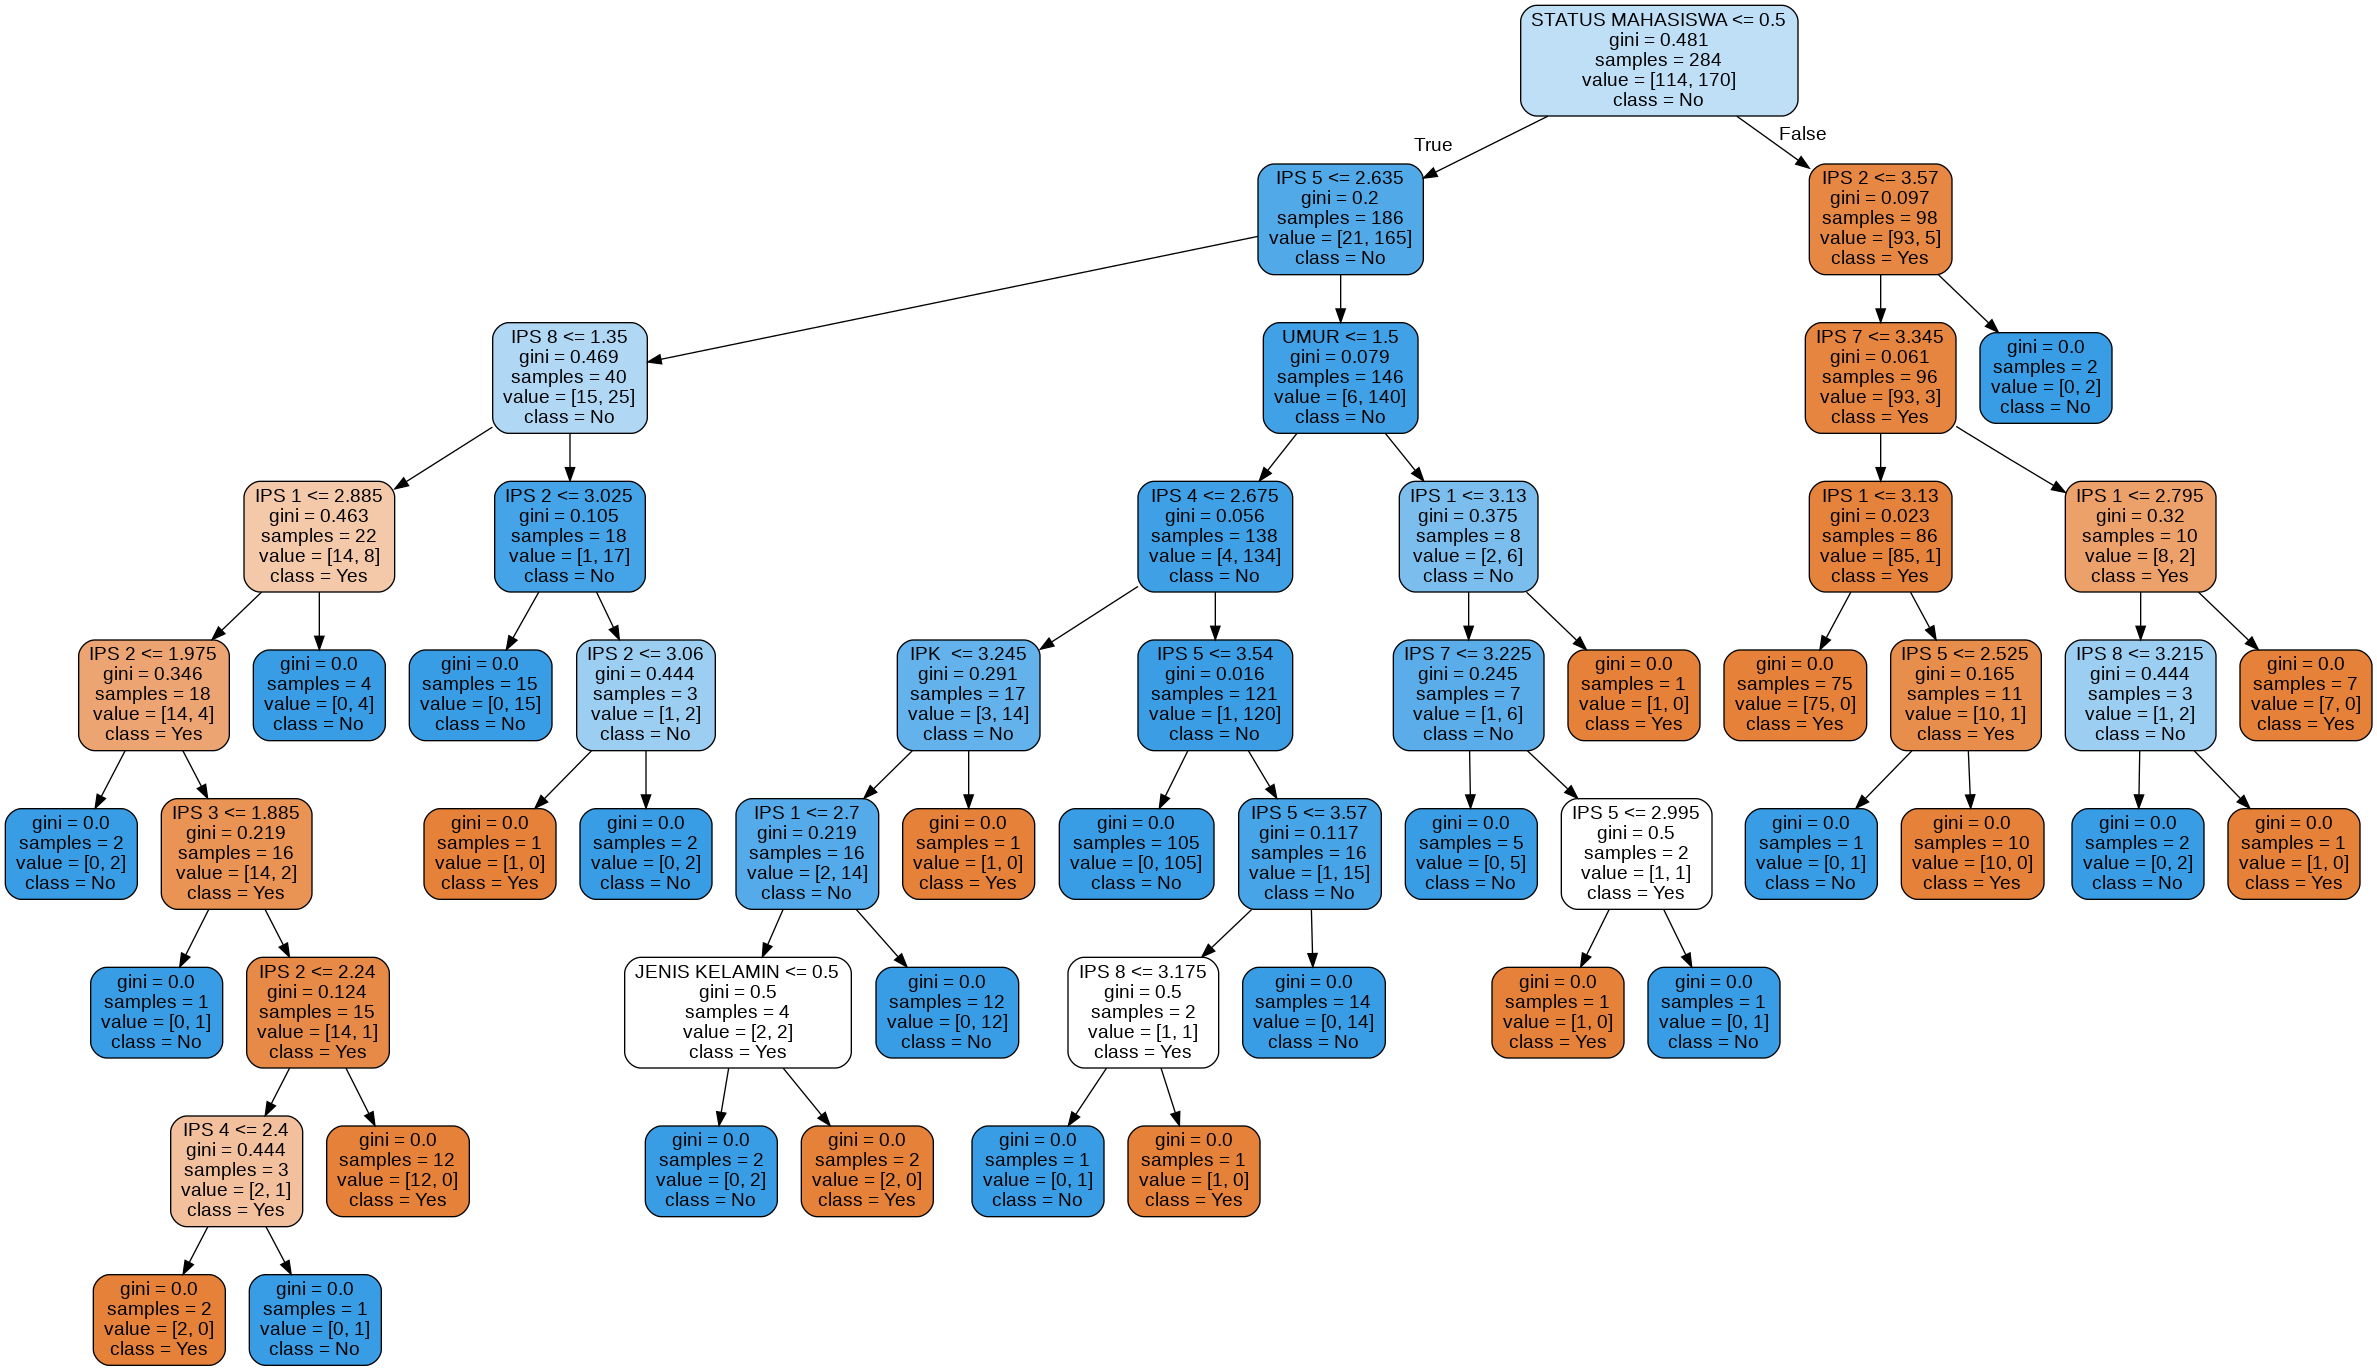

In [48]:
dot_data = export_graphviz(
    tree_model,
    out_file = None,
    feature_names = list(x.columns.values),
    class_names = ['Yes', 'No'],
    rounded = True,
    filled = True
)

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())

In [49]:
tree_model.predict([[0,	1,	1,	0,	2.76,	2.80,	3.20,	3.17,	2.98,	3.00,	3.03,	0.0,	3.07],
                    [1,	0,	0,	0,	1.98,	2.50,	2.14,	2.77,	2.61,	2.93,	2.82,	2.5,	0.99],
                    [0,	0,	0,	0,	3.02,	2.94,	3.25,	2.87,	3.00,	2.94,	3.09,	3.0,	3.16],
                    [0,	1,	1,	0,	2.90,	2.89,	3.30,	2.85,	2.98,	3.00,	3.08,	0.0,	3.09],
                    [1,	0,	0,	0,	1.98,	2.50,	2.14,	2.77,	2.61,	2.93,	2.82,	2.5,	0.99],])


array([0, 1, 1, 0, 1])